In [1]:
%matplotlib notebook

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from utils import *

np.random.seed(1)

### Eades

<IPython.core.display.Javascript object>


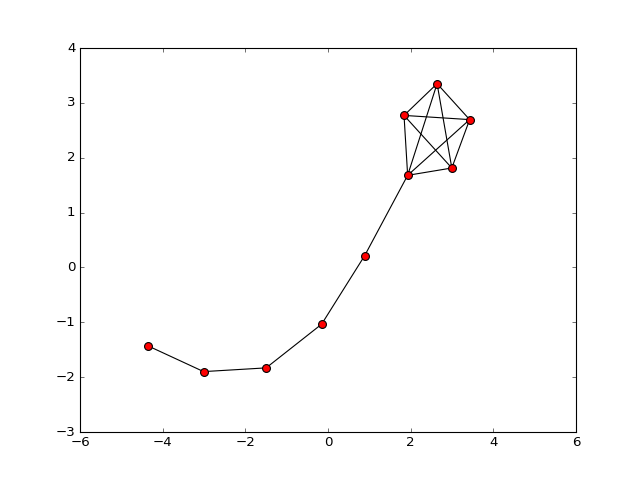

In [8]:
class Eades:
    '''
    A simple spring 2D layout model for graphs with up to 30 vertices
    
    Peter Eades. A heuristic for graph drawing. Congressus Numerantium,
    42:149–160, 1984. 
    '''
    
    def __init__(self, G, c1=2., c2=1., c3=1., c4=0.1):
        self.G = G
        self.M = nx.to_scipy_sparse_matrix(G, dtype='f')

        self.c1 = c1
        self.c2 = c2
        self.c3 = c3
        self.c4 = c4

        self.N_nodes = self.M.shape[0]
        self.pos = np.random.random((self.N_nodes, 2))

    def run(self, iterations=100):
        assert iterations >= 1
        assert type(iterations) is int

        # encode point coordinates as complex numbers
        z = np.array([complex(p[0], p[1]) for p in self.pos])

        for _ in range(iterations):
            delta = z[..., np.newaxis] - z  # pairwise Δx and Δy
            distance = abs(delta)  # pairwise distance

            distance[distance == 0] = 1
            delta = div0(delta, distance)  # normalize delta vectors

            # all nodes exert a repulsive force on node i
            repulsion = np.multiply(self.c3 / np.square(distance), delta)

            # neighbor nodes exert an attractive force on node i
            attraction = -1.0 * self.c1 * np.multiply(np.log((distance) / self.c2), delta)
            attraction = np.multiply(attraction, self.M.toarray())

            disp = self.c4 * np.sum(np.add(repulsion, attraction), axis=1)
            z = np.add(z, disp)

        self.pos = np.array([np.real(z), np.imag(z)]).T
        
    def display(self):
        display_plot(self.G, dict(zip(G.nodes(), self.pos)))

G = nx.lollipop_graph(5, 5)
graph = Eades(G)
graph.run(iterations=100)
graph.display()